Selected Country: IN, Locale: en-IN
Using API v4 (Windows 11, up to 4K, requesting 1 image(s))
Attempting to fetch data from API v4...
Request URL: https://fd.api.iris.microsoft.com/v4/api/selection?placement=88000820&bcnt=1&country=IN&locale=en-IN&fmt=json
Found 1 item(s) in API v4 response.

--- Processing raw item 1 from API ---
Item 1: Found 'item' key with a string value. Attempting JSON parse.
Item 1: Successfully parsed 'item' string into a dictionary.
Item 1: Found image URL in ad_data['landscapeImage']['asset'] (res: ?x?).

Source URL: https://res.public.onecdn.static.microsoft/creativeservice/a3e150de-39df-b496-bda6-4437b2e52b0b_desktop-b006_aerialtenerifecanaryislands_gettyimages-1316592204_3840x2160.jpg
Image saved in Colab as: spotlight_v4_2025-05-27_1_A_rainbow_of_rooftops.jpg
Displaying image (may take a moment):


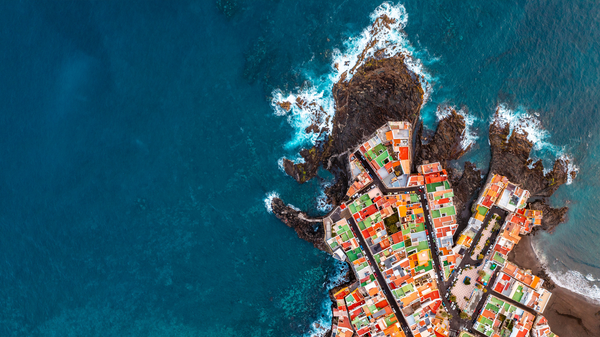

Dimensions: 3840x2160
Title: A rainbow of rooftops
To download 'spotlight_v4_2025-05-27_1_A_rainbow_of_rooftops.jpg' to your local computer, use the link below or check your browser's downloads:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

--- Script Finished ---


In [9]:
#@title Windows Spotlight Image Downloader (API v3 & v4)
#@markdown This script fetches and downloads images from the Windows Spotlight APIs.
#@markdown - **API v4** is used by Windows 11 (up to 4K).
#@markdown - **API v3** is used by Windows 10 (up to 1080p).
#@markdown ---

import requests
import json
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML
from google.colab import files
import datetime
import os
import urllib.parse # For encoding URL parameters

# --- Configuration ---
#@markdown ### API Selection and Parameters:
API_VERSION = "v4"  #@param ["v4", "v3"] {allow-input: false}
COUNTRY_CODE = "IN"  #@param {type:"string"}
LOCALE = "en-IN"  #@param {type:"string"}

#@markdown ---
#@markdown ### API v4 Specific:
#@markdown (Used if API_VERSION is "v4")
V4_IMAGE_COUNT = 1 #@param {type:"slider", min:1, max:4, step:1}

#@markdown ---
#@markdown ### API v3 Specific:
#@markdown (Used if API_VERSION is "v3")
#@markdown `disphorzres` and `dispvertres` (screen resolution) can influence server-side scaling for API v3.
V3_DISPLAY_HORZ_RES = 3840 #@param {type:"integer"}
V3_DISPLAY_VERT_RES = 2160 #@param {type:"integer"}

# --- Constants ---
API_V3_HOSTNAME = "arc.msn.com"
API_V3_ENDPOINT = "/v3/Delivery/Placement"
API_V3_PID = "209567" # Public subscription ID for Windows lockscreens

API_V4_HOSTNAME = "fd.api.iris.microsoft.com"
API_V4_ENDPOINT = "/v4/api/selection"
API_V4_PLACEMENT_ID = "88000820" # Public subscription ID for Windows lockscreens and wallpapers

# Common User Agent (helps avoid "No ad available" with API v4 sometimes)
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"

# --- Helper Functions ---

def fetch_data_from_api(url, api_name):
    """Fetches JSON data from the specified API URL."""
    print(f"Attempting to fetch data from {api_name}...")
    print(f"Request URL: {url}")
    headers = {'User-Agent': USER_AGENT}
    try:
        response = requests.get(url, headers=headers, timeout=20) # Added timeout
        response.raise_for_status() # Raise an exception for HTTP errors

        # Check for "No ad available" which can be a plain text response
        if "no ad available" in response.text.lower():
            print(f"Warning: API ({api_name}) responded with 'No ad available'.")
            print("This can sometimes happen with API v4. Try changing Country/Locale or wait a bit.")
            print("Full response text:", response.text[:500]) # Print first 500 chars
            return None

        return response.json()
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error fetching data from {api_name}: {e}")
        print(f"Response Content: {e.response.text[:500] if e.response else 'No response content'}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {api_name}: {e}")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON response from {api_name}. The API might have changed or returned unexpected content.")
        print(f"Response text that failed to parse: {response.text[:500] if response else 'No response'}")
    return None

def download_and_save_image(image_url, title, index, api_version_tag): # 'title' is the parameter name
    """Downloads an image, saves it, displays it, and provides a download link."""
    if not image_url:
        print(f"No image URL provided for item {index+1}. Skipping.")
        return

    print(f"\nDownloading image {index+1}: {title if title else 'Untitled'}") # Display original or 'Untitled'
    print(f"Source URL: {image_url}")

    try:
        image_response = requests.get(image_url, headers={'User-Agent': USER_AGENT}, timeout=30)
        image_response.raise_for_status()

        # Create a filename
        today_date = datetime.date.today().strftime("%Y-%m-%d")

        # --- MODIFIED SECTION FOR safe_title ---
        # Determine the base string for sanitization: use "Untitled" if the input 'title' is None or empty
        string_to_sanitize_for_filename = title  # Start with the passed 'title'
        if not string_to_sanitize_for_filename:  # Checks for None or empty string
            string_to_sanitize_for_filename = "Untitled" # Default if title was empty or None

        # Perform the sanitization on the determined string
        safe_title_chars = []
        for char_in_title in string_to_sanitize_for_filename:
            if char_in_title.isalnum() or char_in_title in (' ', '.', '_'):
                safe_title_chars.append(char_in_title)
            else:
                safe_title_chars.append('_')

        safe_title = "".join(safe_title_chars).rstrip()
        safe_title = safe_title[:50] # Limit length of the sanitized title part
        # --- END OF MODIFIED SECTION ---

        extension = os.path.splitext(urllib.parse.urlparse(image_url).path)[1]
        if not extension or len(extension) > 5 or '?' in extension:
            extension = ".jpg"

        filename = f"spotlight_{api_version_tag}_{today_date}_{index+1}_{safe_title}{extension}"
        filename = filename.replace(" ", "_")

        with open(filename, 'wb') as f:
            f.write(image_response.content)
        print(f"Image saved in Colab as: {filename}")

        print("Displaying image (may take a moment):")
        img = Image.open(BytesIO(image_response.content))

        max_display_width = 600
        if img.width > max_display_width:
            ratio = max_display_width / img.width
            new_height = int(img.height * ratio)
            img_display = img.resize((max_display_width, new_height), Image.LANCZOS)
        else:
            img_display = img

        display(img_display)
        print(f"Dimensions: {img.width}x{img.height}")

        # Display the original title if available, not the sanitized one for filename
        if title: print(f"Title: {title}")


        print(f"To download '{filename}' to your local computer, use the link below or check your browser's downloads:")
        files.download(filename)
        print("---")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image {index+1} from {image_url}: {e}")
    except IOError as e:
        print(f"Error opening or displaying image {index+1}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred with image {index+1}: {e}")

# --- API Specific Logic ---

def process_spotlight_v3():
    """Handles fetching and processing for API v3."""
    print("Using API v3 (Windows 10, max 1080p)")
    current_time_utc = datetime.datetime.utcnow().strftime("%Y-%m-%dT%H:%M:%SZ")
    params = {
        'pid': API_V3_PID,
        'fmt': 'json',
        'ua': 'WindowsShellClient/0', # As per example
        'cdm': '1',
        'disphorzres': V3_DISPLAY_HORZ_RES,
        'dispvertres': V3_DISPLAY_VERT_RES,
        'pl': LOCALE,
        'lc': LOCALE, # Assuming pl and lc are the same, common practice
        'ctry': COUNTRY_CODE,
        'time': current_time_utc
    }
    query_string = urllib.parse.urlencode(params)
    full_url = f"https://{API_V3_HOSTNAME}{API_V3_ENDPOINT}?{query_string}"

    data = fetch_data_from_api(full_url, "API v3")

    if data and 'item' in data and isinstance(data['item'], list) and len(data['item']) > 0:
        # API v3 seems to return an array for 'item', even if it's just one.
        # We'll process the first one as it's for the lockscreen.
        item_ad = data['item'][0].get('ad', {})

        # Try to find the landscape image URL and title
        # The key 'image_fullscreen_001_landscape' is a common one, but let's be a bit robust
        image_url = None
        title = item_ad.get('title_text', {}).get('tx')
        copyright_text = item_ad.get('copyright_text', {}).get('tx')
        if copyright_text and not title: title = copyright_text # Use copyright if title is missing

        # Iterate through ad keys to find a suitable image URL
        # This is a bit of a guess based on common ad structures if 'image_fullscreen_001_landscape' isn't there
        image_keys_to_try = ['image_fullscreen_001_landscape', 'image_landscape', 'image']
        for key_part in image_keys_to_try:
            for ad_key, ad_value in item_ad.items():
                if key_part in ad_key and isinstance(ad_value, dict) and 'u' in ad_value:
                    image_url = ad_value['u']
                    if 'w' in ad_value and 'h' in ad_value:
                         print(f"Found image in ad_key '{ad_key}' with resolution: {ad_value['w']}x{ad_value['h']}")
                    break
            if image_url:
                break

        if not image_url: # Fallback, just take the first URL found in any 'u' field.
            for ad_key, ad_value in item_ad.items():
                if isinstance(ad_value, dict) and 'u' in ad_value and ad_value['u'].startswith('http'):
                    image_url = ad_value['u']
                    print(f"Fallback: Found image URL in ad_key '{ad_key}'.")
                    break

        if image_url:
            download_and_save_image(image_url, title if title else "Spotlight V3 Image", 0, "v3")
        else:
            print("Could not find a suitable image URL in API v3 response.")
            print("Response structure snippet for 'item_ad':")
            print(json.dumps(item_ad, indent=2, ensure_ascii=False)[:1000]) # Print part of the structure for debugging

    elif data:
        print("API v3 response received, but 'item' structure not as expected or empty.")
        print("Full response data:")
        print(json.dumps(data, indent=2, ensure_ascii=False)[:1000]) # Print part of the structure for debugging
    else:
        print("Failed to fetch data or data was None from API v3.")


def process_spotlight_v4():
    """Handles fetching and processing for API v4."""
    print(f"Using API v4 (Windows 11, up to 4K, requesting {V4_IMAGE_COUNT} image(s))")
    params = {
        'placement': API_V4_PLACEMENT_ID,
        'bcnt': V4_IMAGE_COUNT,
        'country': COUNTRY_CODE,
        'locale': LOCALE,
        'fmt': 'json'
    }
    query_string = urllib.parse.urlencode(params)
    full_url = f"https://{API_V4_HOSTNAME}{API_V4_ENDPOINT}?{query_string}"

    data = fetch_data_from_api(full_url, "API v4")

    if data and 'batchrsp' in data and isinstance(data['batchrsp'], dict) and 'items' in data['batchrsp']:
        items = data['batchrsp']['items']
        if not isinstance(items, list):
            print(f"API v4 'items' field is not a list. Type: {type(items)}. Full response snippet:")
            print(json.dumps(data, indent=2, ensure_ascii=False)[:1000])
            return
        if not items:
            print("API v4 returned an empty list of items.")
            return

        print(f"Found {len(items)} item(s) in API v4 response.")
        for i, item_container in enumerate(items):
            print(f"\n--- Processing raw item {i+1} from API ---")
            if not isinstance(item_container, dict):
                print(f"Warning: item_container at index {i} is not a dictionary (type: {type(item_container)}). Skipping.")
                print(f"Value: {str(item_container)[:500]}")
                continue

            item_payload = item_container.get('item')
            actual_ad_structure_dict = None

            if isinstance(item_payload, dict):
                print(f"Item {i+1}: Found 'item' key with a dictionary value.")
                actual_ad_structure_dict = item_payload
            elif isinstance(item_payload, str):
                print(f"Item {i+1}: Found 'item' key with a string value. Attempting JSON parse.")
                try:
                    parsed_payload = json.loads(item_payload)
                    if isinstance(parsed_payload, dict):
                        print(f"Item {i+1}: Successfully parsed 'item' string into a dictionary.")
                        actual_ad_structure_dict = parsed_payload
                    else:
                        print(f"Warning: Item {i+1}: Parsed 'item' string, but it's not a dict (type: {type(parsed_payload)}). Fallback will be attempted.")
                except json.JSONDecodeError:
                    print(f"Warning: Item {i+1}: 'item' field is a string but not valid JSON: '{item_payload[:100]}...'. Fallback will be attempted.")
            else:
                if item_payload is not None:
                     print(f"Item {i+1}: 'item' key exists but is neither dict nor string (type: {type(item_payload)}). Fallback will be attempted.")
                else:
                     print(f"Item {i+1}: 'item' key not found or is None. Fallback will be attempted.")

            if actual_ad_structure_dict is None:
                print(f"Item {i+1}: Fallback - using the main item_container as the ad structure.")
                actual_ad_structure_dict = item_container

            if not isinstance(actual_ad_structure_dict, dict):
                print(f"Error: Item {i+1}: Could not resolve to a usable dictionary for ad data. Skipping.")
                continue

            ad_data = actual_ad_structure_dict.get('ad', {})
            if not isinstance(ad_data, dict):
                print(f"Warning: Item {i+1}: 'ad' data is not a dictionary (type: {type(ad_data)}). Value: '{str(ad_data)[:200]}'. Using empty ad_data.")
                ad_data = {}

            image_url = None
            title = ad_data.get('title_text', {}).get('tx') or ad_data.get('title') # Also check for direct 'title' key
            description = ad_data.get('caption_text', {}).get('tx') or \
                          ad_data.get('description_text', {}).get('tx') or \
                          ad_data.get('description') # Also check for direct 'description' key

            # Try to use iconHoverText if title and description are missing, as it often has good info
            icon_hover_text = ad_data.get('iconHoverText')
            if not title and icon_hover_text and isinstance(icon_hover_text, str):
                title_candidate = icon_hover_text.splitlines()[0] # Take the first line
                # Avoid using generic "Right-click to learn more" as title
                if "right-click" not in title_candidate.lower() and "learn more" not in title_candidate.lower():
                    title = title_candidate


            if description and not title:
                title = description
            elif not title and not description:
                if icon_hover_text and isinstance(icon_hover_text, str): # More robust title from hover text
                    parts = icon_hover_text.split('\r\n')
                    if parts:
                        title = parts[0] # Usually the title is the first line
                if not title: # Ultimate fallback
                    title = f"Spotlight V4 Image {i+1}"


            # --- MODIFIED IMAGE URL EXTRACTION LOGIC ---
            # Key names to check for, in order of preference (landscape often preferred for wallpaper)
            image_keys_to_check = [
                'image_fullscreen_001_landscape', # Original primary target
                'image_sht_flscr_L',              # Original shorthand
                'landscapeImage',                 # As seen in your example
                'portraitImage',                  # Fallback to portrait if landscape not found by this name
                'image',                          # Generic image key
            ]

            # Check for structures like: "landscapeImage": { "u": "URL" } or { "asset": "URL" }
            # Also direct string value like "landscapeImage": "URL" (less common for rich data)

            for key_name in image_keys_to_check:
                image_info = ad_data.get(key_name)
                if isinstance(image_info, dict):
                    if 'asset' in image_info and isinstance(image_info['asset'], str) and image_info['asset'].startswith('http'):
                        image_url = image_info['asset']
                        res_info = f" (res: {image_info.get('w','?')}x{image_info.get('h','?')})"
                        print(f"Item {i+1}: Found image URL in ad_data['{key_name}']['asset']{res_info}.")
                        break
                    elif 'u' in image_info and isinstance(image_info['u'], str) and image_info['u'].startswith('http'):
                        image_url = image_info['u']
                        res_info = f" (res: {image_info.get('w','?')}x{image_info.get('h','?')})"
                        print(f"Item {i+1}: Found image URL in ad_data['{key_name}']['u']{res_info}.")
                        break
                elif isinstance(image_info, str) and image_info.startswith('http'): # Direct URL string
                    image_url = image_info
                    print(f"Item {i+1}: Found direct image URL in ad_data['{key_name}'].")
                    break

            if not image_url: # Broader fallback if specific keys didn't yield URL
                print(f"Item {i+1}: Preferred image keys not found or no URL in them. Doing a broader search in 'ad_data' values...")
                for ad_key, ad_value in ad_data.items():
                    if isinstance(ad_value, dict): # e.g. ad_value is {"asset": "URL", "w":1920, ...}
                        if 'asset' in ad_value and isinstance(ad_value['asset'], str) and ad_value['asset'].startswith('http'):
                            image_url = ad_value['asset']
                            res_info = f" (res: {ad_value.get('w','?')}x{ad_value.get('h','?')})"
                            print(f"Item {i+1}: Fallback - Found image URL in ad_data['{ad_key}']['asset']{res_info}.")
                            break
                        elif 'u' in ad_value and isinstance(ad_value['u'], str) and ad_value['u'].startswith('http'):
                            image_url = ad_value['u']
                            res_info = f" (res: {ad_value.get('w','?')}x{ad_value.get('h','?')})"
                            print(f"Item {i+1}: Fallback - Found image URL in ad_data['{ad_key}']['u']{res_info}.")
                            break
                    elif isinstance(ad_value, str) and ad_value.startswith('http') and ('.jpg' in ad_value or '.png' in ad_value): # Direct URL string that looks like an image
                         # Be careful this doesn't pick up generic web links, check for image extensions.
                        image_url = ad_value
                        print(f"Item {i+1}: Fallback - Found direct image-like URL string in ad_data['{ad_key}'].")
                        break
            # --- END OF MODIFIED LOGIC ---

            if image_url:
                download_and_save_image(image_url, title, i, "v4")
            else:
                print(f"Item {i+1}: Could not find a suitable image URL in API v4 response.")
                print(f"Relevant 'actual_ad_structure_dict' (where 'ad' data was sourced) snippet for item {i+1}:")
                print(json.dumps(actual_ad_structure_dict, indent=2, ensure_ascii=False)[:1500]) # Increased snippet size

    elif data:
        print("API v4 response received, but 'batchrsp' or 'items' structure not as expected or empty.")
        print("Full response data:")
        print(json.dumps(data, indent=2, ensure_ascii=False)[:1000])
    else:
        print("Failed to fetch data or data was None from API v4.")

# --- Main Execution ---
if __name__ == '__main__':
    display(HTML(f"<h2><img src='https://www.gstatic.com/images/branding/product/1x/google_images_32dp.png' style='vertical-align:middle;height:28px;'> Windows Spotlight Image Downloader</h2>")) # Fun icon
    print(f"Selected Country: {COUNTRY_CODE}, Locale: {LOCALE}")

    if API_VERSION == "v3":
        process_spotlight_v3()
    elif API_VERSION == "v4":
        process_spotlight_v4()
    else:
        print("Invalid API_VERSION selected.")

    print("\n--- Script Finished ---")